Croping CDL files to potential areas of interest

In [20]:
CDL_fname = '../CDL_files/CDL_Kings_2016_06031/CDL_2016_06031.tif'
aoi_fname = '../geojson_ROIs/kings_05.geojson'

import sys
import os
import glob
import json
import scipy
import urllib
import datetime 
import urllib3
import rasterio
import subprocess
import numpy as np
import pandas as pd
#import seaborn as sns
from osgeo import gdal
from planet import api
from planet.api import filters
from traitlets import link
import rasterio.tools.mask as rio_mask
from shapely.geometry import mapping, shape
from IPython.display import display, Image, HTML
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
urllib3.disable_warnings()
from ipyleaflet import (
    Map,
    Marker,
    TileLayer, ImageOverlay,
    Polyline, Polygon, Rectangle, Circle, CircleMarker,
    GeoJSON,
    DrawControl
)

%matplotlib inline
# will pick up api_key via environment variable PL_API_KEY
# but can be specified using `api_key` named argument

#os.environ["PL_API_KEY"] = ""
#api_keys = json.load(open("apikeys.json",'r'))
client = api.ClientV1(api_key=os.environ["PL_API_KEY"])

In [21]:
cdl_files = []
cdl_files.append(CDL_fname)
print(cdl_files)

['../CDL_files/CDL_Kings_2016_06031/CDL_2016_06031.tif']


In [22]:
def load_image3(filename):
    """Return a 3D (r, g, b) numpy array with the data in the specified TIFF filename."""
    path = os.path.abspath(os.path.join('./', filename))
    if os.path.exists(path):
        with rasterio.open(path) as src:
            #b,g,r,mask = src.read()
            img = src.read()
            return img
            #return np.dstack([b, g, r])

In [23]:
img_files = []
masks = []
# load the images and masks
print(cdl_files)
for fname in cdl_files:
    img = load_image3(fname)
    #img_files.append(load_image3(fname))
    img_files.append(mpimg.imread(fname))
    #masks.append(get_mask(fname))
    

['../CDL_files/CDL_Kings_2016_06031/CDL_2016_06031.tif']


In [24]:
print(img.shape)
print(len(img_files))

(1, 2557, 2878)
1


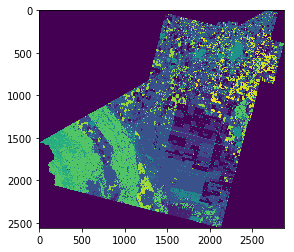

In [25]:
plt.figure()
plt.imshow(np.squeeze(img))
plt.show()

In [26]:
aoi_file = aoi_fname 
# write our input AOI to a geojson file.

with open(aoi_file) as f:
    aoi = json.load(f)
print(aoi)
myAOI = aoi 
    
# create our full input and output names
clip_names = [os.path.abspath(cdl[:-4]+"_clip"+".tif") for cdl in cdl_files]
full_cdl_files = [os.path.abspath("./"+cdl) for cdl in cdl_files]

for in_file,out_file in zip(cdl_files,clip_names):
    commands = ["gdalwarp", # t
           "-t_srs","EPSG:3857",
           "-cutline",aoi_file,
           "-crop_to_cutline",
           "-tap",
            "-tr", "3", "3"
           "-overwrite"]
    subprocess.call(["rm",out_file])
    commands.append(in_file)
    commands.append(out_file)
    print " ".join(commands)
    subprocess.call(commands)

{u'type': u'Polygon', u'coordinates': [[[-119.6147, 36.2116], [-119.5298, 36.2116], [-119.5298, 36.2981], [-119.6147, 36.2981], [-119.6147, 36.2116]]]}
gdalwarp -t_srs EPSG:3857 -cutline ../geojson_ROIs/kings_05.geojson -crop_to_cutline -tap -tr 3 3-overwrite ../CDL_files/CDL_Kings_2016_06031/CDL_2016_06031.tif /home/jovyan/work/temporal-crop-classification/CDL_files/CDL_Kings_2016_06031/CDL_2016_06031_clip.tif
